<a href="https://colab.research.google.com/github/M0n1ka-05/Topic-Modelling-on-news-article/blob/main/Monika_Shinde_Team_3_Capestone_Project_4_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
import ast

In [3]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [4]:
business_path= glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/business/*.txt")
entertainment_path = glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/entertainment/*.txt")
politics_path = glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/politics/*.txt")
sports_path = glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/sport/*.txt")
tech_path = glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/tech/*.txt")


In [49]:
print(f' Business news count: {len(business_path)}')
print(f' Entertainment news count: {len(entertainment_path)}')
print(f' Politics news count: {len(politics_path)}')
print(f' Sports news count: {len(sports_path)}')
print(f' Tech news count: {len(tech_path)}')

 Business news count: 510
 Entertainment news count: 386
 Politics news count: 417
 Sports news count: 511
 Tech news count: 401


In [5]:
#file_list = [business_path[:400],entertainment_path[:400],politics_path[:400],sports_path[:400],tech_path[:400]]
file_list = [business_path,entertainment_path,politics_path,sports_path,tech_path]


In [6]:
corpus = []

for file_path in file_list:
  for path in file_path:
    with open(path,encoding='utf-8', errors='ignore') as file_input:
      corpus.append(file_input.read())


In [7]:
print (corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
len(corpus)

2225

In [9]:
type(corpus)

list

In [10]:
new_df = pd.DataFrame (corpus,columns=['news'])

In [11]:
new_df.head(5)

,news
0,Yukos unit buyer faces loan claim\n\nThe owner...
1,Ad sales boost Time Warner profit\n\nQuarterly...
2,Dollar gains on Greenspan speech\n\nThe dollar...
3,US trade gap hits record in 2004\n\nThe gap be...
4,High fuel prices hit BA's profits\n\nBritish A...


In [12]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
def rmv_punctuation(text):
    return ''.join(s for s in text if s not in punctuation)

In [14]:
new_df['news'] = new_df['news'].apply(rmv_punctuation)


In [15]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [16]:
def rmv_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [17]:
new_df['news'] = new_df['news'].apply(rmv_stopwords)
new_df.head(10)

,news
0,yukos unit buyer faces loan claim owners embat...
1,ad sales boost time warner profit quarterly pr...
2,dollar gains greenspan speech dollar hit highe...
3,us trade gap hits record 2004 gap us exports i...
4,high fuel prices hit bas profits british airwa...
5,india widens access telecoms india raised limi...
6,yukos loses us bankruptcy battle judge dismiss...
7,ask jeeves tips online ad revival ask jeeves b...
8,indonesians face fuel price rise indonesias go...
9,telegraph newspapers axe 90 jobs daily sunday ...


In [18]:
new_df.shape

(2225, 1)

In [19]:
# removing everything except alphabets`
new_df['processed_news'] = new_df['news'].str.replace("[^a-zA-Z#]", " ")


In [20]:
# removing short words
new_df['processed_news'] = new_df['processed_news'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [21]:
new_df.head(5)

,news,processed_news
0,yukos unit buyer faces loan claim owners embat...,yukos unit buyer faces loan claim owners embat...
1,ad sales boost time warner profit quarterly pr...,sales boost time warner profit quarterly profi...
2,dollar gains greenspan speech dollar hit highe...,dollar gains greenspan speech dollar highest l...
3,us trade gap hits record 2004 gap us exports i...,trade hits record exports imports alltime high...
4,high fuel prices hit bas profits british airwa...,high fuel prices profits british airways blame...


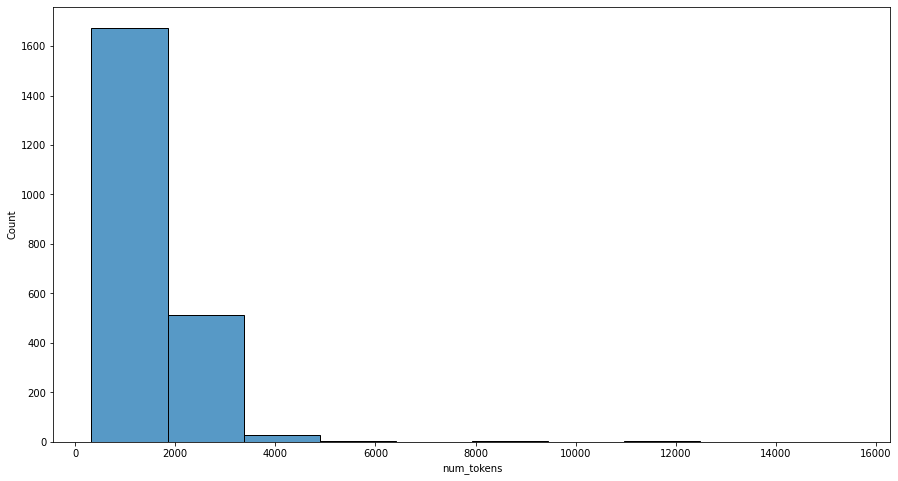

In [22]:
# Sum the number of tokens in each Doc
new_df['num_tokens'] = [len(token) for token in new_df.processed_news]
# Visualize histogram of tokens per tweet
plt.figure(figsize=(15,8))
g = sns.histplot(new_df.num_tokens, bins = 10)

In [23]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

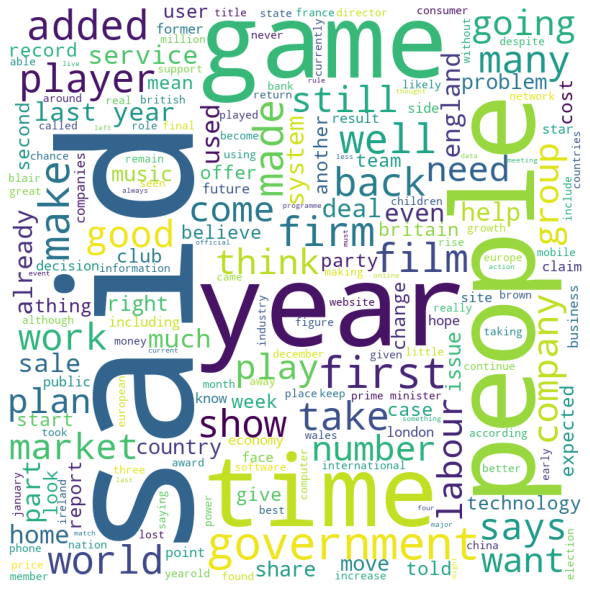

In [24]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in new_df.processed_news: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [25]:
news_data = new_df['processed_news']

In [26]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_news = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_news, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_news.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [27]:
news_data.values

array(['yukos unit buyer faces loan claim owners embattled russian giant yukos buyer former production unit back loan stateowned rosneft bought yugansk unit sale forced russia part settle claim yukos yukos owner menatep group says rosneft repay loan yugansk secured assets rosneft already faces similar repayment demand foreign banks legal experts said rosnefts purchase yugansk would include obligations pledged assets rosneft real money creditors avoid seizure yugansk assets said moscowbased lawyer jamie firestone connected case menatep groups managing director osborne told reuters news agency default fight rule exists international arbitration clauses credit rosneft officials unavailable comment company said intends take action menatep recover claims debts owed yugansk yukos filed bankruptcy protection court attempt prevent forced sale main production sale went ahead december yugansk sold littleknown shell company turn bought rosneft yukos claims downfall punishment political ambitions 

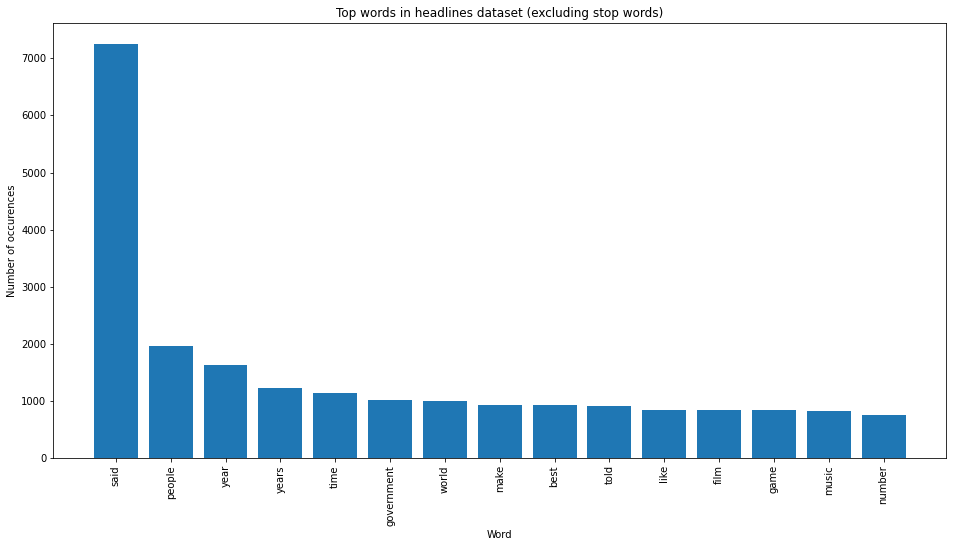

In [28]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=news_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [29]:
new_df.head(6)

,news,processed_news,num_tokens
0,yukos unit buyer faces loan claim owners embat...,yukos unit buyer faces loan claim owners embat...,1043
1,ad sales boost time warner profit quarterly pr...,sales boost time warner profit quarterly profi...,1690
2,dollar gains greenspan speech dollar hit highe...,dollar gains greenspan speech dollar highest l...,1527
3,us trade gap hits record 2004 gap us exports i...,trade hits record exports imports alltime high...,1250
4,high fuel prices hit bas profits british airwa...,high fuel prices profits british airways blame...,1603
5,india widens access telecoms india raised limi...,india widens access telecoms india raised limi...,1246


In [30]:
vectors = count_vectorizer.fit_transform(news_data)
feature_names = count_vectorizer.get_feature_names()

print(feature_names)

['aaas', 'aadc', 'aaliyah', 'aaliyahs', 'aaltra', 'aamir', 'aara', 'aarhus', 'aaron', 'abacus', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abate', 'abatement', 'abating', 'abba', 'abbas', 'abbasi', 'abbey', 'abbot', 'abbott', 'abbotts', 'abbreviated', 'abdellatif', 'abdication', 'abdomen', 'abdominal', 'abducted', 'abduction', 'abdul', 'abdullah', 'abdullatif', 'abebe', 'abensur', 'aberavon', 'aberdeen', 'aberdeenbased', 'aberration', 'aberystwyth', 'abetting', 'abeyance', 'abeyie', 'abhorrent', 'abide', 'abided', 'abiding', 'abigail', 'abilities', 'ability', 'abishuly', 'abiyote', 'able', 'ablebodied', 'abnormal', 'abnormality', 'abolish', 'abolished', 'abolishing', 'abolition', 'aborted', 'abortion', 'abortionist', 'abortions', 'abortive', 'aboutroughly', 'aboveaverage', 'abraham', 'abramovich', 'abramovichs', 'abroad', 'abruptly', 'absa', 'absas', 'absence', 'absences', 'absent', 'absentee', 'absolute', 'absolutely', 'absolution', 'absorb', 'absorbed', 'absorbing', 'absor

In [31]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(vectors)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(vectors))



Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -882646.3445755178
LDA model Perplexity on train data 5647.852794493289


In [32]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 11.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=fc3636fa603d64f9d936fb2d961d111d7d3c399ebc1bdcdb6d03e0aac97c7c1a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [33]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [34]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, vectors,count_vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  30.445843
3       51.163364 -159.968018       2        1  26.437271
0      -73.144554   21.523815       3        1  14.950526
4      -66.410133 -110.606438       4        1  14.910881
1       54.417324   12.443444       5        1  13.255479, topic_info=             Term        Freq        Total Category  logprob  loglift
9780         film  744.000000   744.000000  Default  30.0000  30.0000
2553         best  838.000000   838.000000  Default  29.0000  29.0000
11283  government  969.000000   969.000000  Default  28.0000  28.0000
14796      labour  619.000000   619.000000  Default  27.0000  27.0000
10710        game  767.000000   767.000000  Default  26.0000  26.0000
...           ...         ...          ...      ...      ...      ...
18687        open  104.740200   337.166520   Topic5  -6.2325   0.8517
27249        took  104.297235   337.825674   Topic5  -6.2368   0.8455
27112        time  119.541527  1068.511357   Topic5  -6.1003  -0.1696
19605      people  127.135153  1836.931100   Topic5  -6.0387  -0.6498
15353        like  105.505754   780.469477   Topic5  -6.2252   0.0196

[393 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
109        1  0.052575    academy
109        4  0.039431    academy
109        5  0.906917    academy
163        1  0.731530  according
163        2  0.102364  according
...      ...       ...        ...
29896      5  0.269494      years
29961      2  0.980198    yugansk
29970      2  0.998173      yukos
30004      2  0.067051    zealand
30004      3  0.927534    zealand

[842 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

### **LSA**

In [35]:
new_df.head(3)

,news,processed_news,num_tokens
0,yukos unit buyer faces loan claim owners embat...,yukos unit buyer faces loan claim owners embat...,1043
1,ad sales boost time warner profit quarterly pr...,sales boost time warner profit quarterly profi...,1690
2,dollar gains greenspan speech dollar hit highe...,dollar gains greenspan speech dollar highest l...,1527


using TF-IDF vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(new_df['processed_news'])

X.shape # check shape of the document-term matrix

(2225, 1000)

In [37]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

5

In [38]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
people
 
year
 
film
 
government
 
game
 
years
 
world
 
Topic 1: 
labour
 
election
 
blair
 
government
 
party
 
brown
 
economy
 
Topic 2: 
labour
 
blair
 
election
 
brown
 
england
 
party
 
wales
 
Topic 3: 
film
 
best
 
awards
 
award
 
labour
 
actor
 
films
 
Topic 4: 
growth
 
economy
 
bank
 
economic
 
sales
 
year
 
prices
 
